In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
ORIGINAL_MODEL_PATH = "/content/drive/MyDrive/vgg16_finetuned.h5"
ROBUST_MODEL_PATH    = "/content/drive/MyDrive/vgg16_adversarial_trained(0005).h5"

CLEAN_TEST_DIR = "/content/drive/MyDrive/Dataset/test"
ADV_TEST_DIR   = "/content/drive/MyDrive/adv_test_epsilon_0005/adv_images"

IMG_SIZE = (224, 224)
BATCH_SIZE = 1


In [6]:
# DATA LOADERS
# -----------------------------
test_gen = ImageDataGenerator(rescale=1./255)

clean_test = test_gen.flow_from_directory(
    CLEAN_TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

adv_test = test_gen.flow_from_directory(
    ADV_TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

Found 1656 images belonging to 2 classes.
Found 1656 images belonging to 2 classes.


In [7]:
# FUNCTION: evaluate model
# -----------------------------
def evaluate_model(model, data, name=""):
    print(f"\n===== Evaluating {name} =====")

    # Accuracy
    loss, acc = model.evaluate(data, verbose=0)
    print(f"Accuracy: {acc*100:.2f}%")

    # Predictions
    y_prob = model.predict(data, verbose=0).ravel()
    y_pred = (y_prob > 0.5).astype(int)
    y_true = data.classes

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=["NO_KOA", "KOA"]))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["NO_KOA", "KOA"],
                yticklabels=["NO_KOA", "KOA"])
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    return acc, y_true, y_pred, cm

In [8]:
# LOAD MODELS
# ================================================
original_model = load_model(ORIGINAL_MODEL_PATH)
robust_model   = load_model(ROBUST_MODEL_PATH)


===== Evaluating Original Model (Clean Test) =====


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Accuracy: 79.17%

Classification Report:
              precision    recall  f1-score   support

      NO_KOA       0.88      0.77      0.82      1017
         KOA       0.69      0.82      0.75       639

    accuracy                           0.79      1656
   macro avg       0.78      0.80      0.79      1656
weighted avg       0.80      0.79      0.79      1656



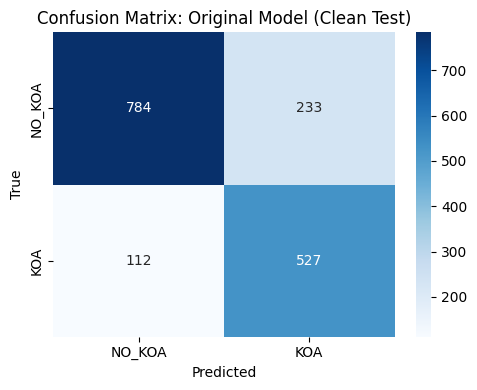

In [9]:
orig_clean_acc, orig_clean_y, orig_clean_pred, _ = evaluate_model(
    original_model, clean_test, name="Original Model (Clean Test)"
)



===== Evaluating Original Model (Adversarial Test) =====


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Accuracy: 2.23%

Classification Report:
              precision    recall  f1-score   support

      NO_KOA       0.05      0.04      0.04      1017
         KOA       0.00      0.00      0.00       639

    accuracy                           0.02      1656
   macro avg       0.03      0.02      0.02      1656
weighted avg       0.03      0.02      0.03      1656



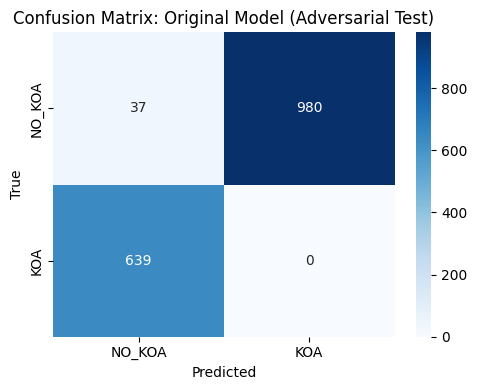

In [10]:
orig_adv_acc, orig_adv_y, orig_adv_pred, _ = evaluate_model(
    original_model, adv_test, name="Original Model (Adversarial Test)"
)



===== Evaluating Robust Model (Clean Test) =====
Accuracy: 78.74%

Classification Report:
              precision    recall  f1-score   support

      NO_KOA       0.83      0.83      0.83      1017
         KOA       0.73      0.72      0.72       639

    accuracy                           0.79      1656
   macro avg       0.78      0.77      0.78      1656
weighted avg       0.79      0.79      0.79      1656



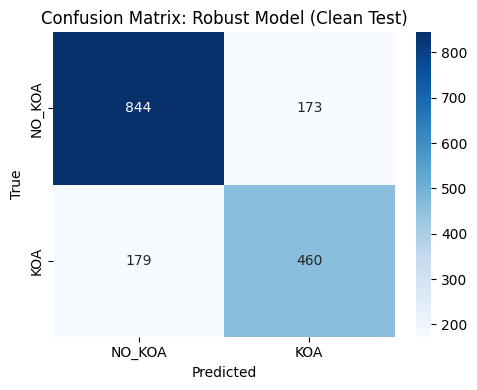

In [11]:
robust_clean_acc, robust_clean_y, robust_clean_pred, _ = evaluate_model(
    robust_model, clean_test, name="Robust Model (Clean Test)"
)


===== Evaluating Robust Model (Adversarial Test) =====
Accuracy: 49.03%

Classification Report:
              precision    recall  f1-score   support

      NO_KOA       0.56      0.80      0.66      1017
         KOA       0.01      0.00      0.00       639

    accuracy                           0.49      1656
   macro avg       0.28      0.40      0.33      1656
weighted avg       0.35      0.49      0.41      1656



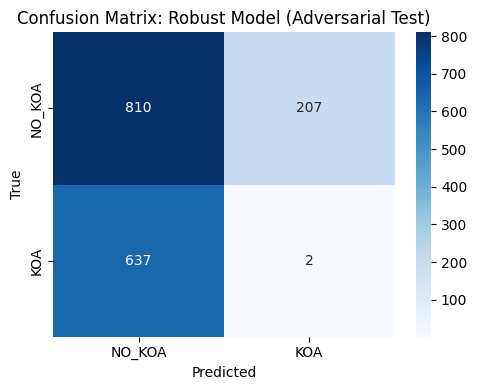

In [12]:
robust_adv_acc, robust_adv_y, robust_adv_pred, _ = evaluate_model(
    robust_model, adv_test, name="Robust Model (Adversarial Test)"
)